# Heart Attack Classification

We want to find how the heart attack was affected depending on the cholesterol, glucose, smoking, blood pressure, and exercise.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing our usual packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#loading our csv file
heart_attack_df = pd.read_csv("/content/drive/MyDrive/DSML/Heart_health.csv")

#checking to see if it is in the code
print(heart_attack_df)

      ID               Name  Age  Gender  Height(cm)  Weight(kg)  \
0      1           John Doe   45    Male         175          80   
1      2         Jane Smith   35  Female         160          65   
2      3    Michael Johnson   55    Male         180          85   
3      4        Sarah Brown   40  Female         165          70   
4      5          David Lee   50    Male         170          75   
..   ...                ...  ...     ...         ...         ...   
719  710    Ashley Martinez   39  Female         166          68   
720  711    James Rodriguez   56    Male         179          83   
721  712        Mary Taylor   43  Female         167          70   
722  713  Christopher Smith   53    Male         182          86   
723  714    Jennifer Garcia   47  Female         170          73   

    Blood Pressure(mmHg)  Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  \
0                 120/80                 200              90     No   
1                 110/70                 

# Exploratory Data Analysis

In [3]:
#Head of the dataset
heart_attack_df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [4]:
#Information on the dataset
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


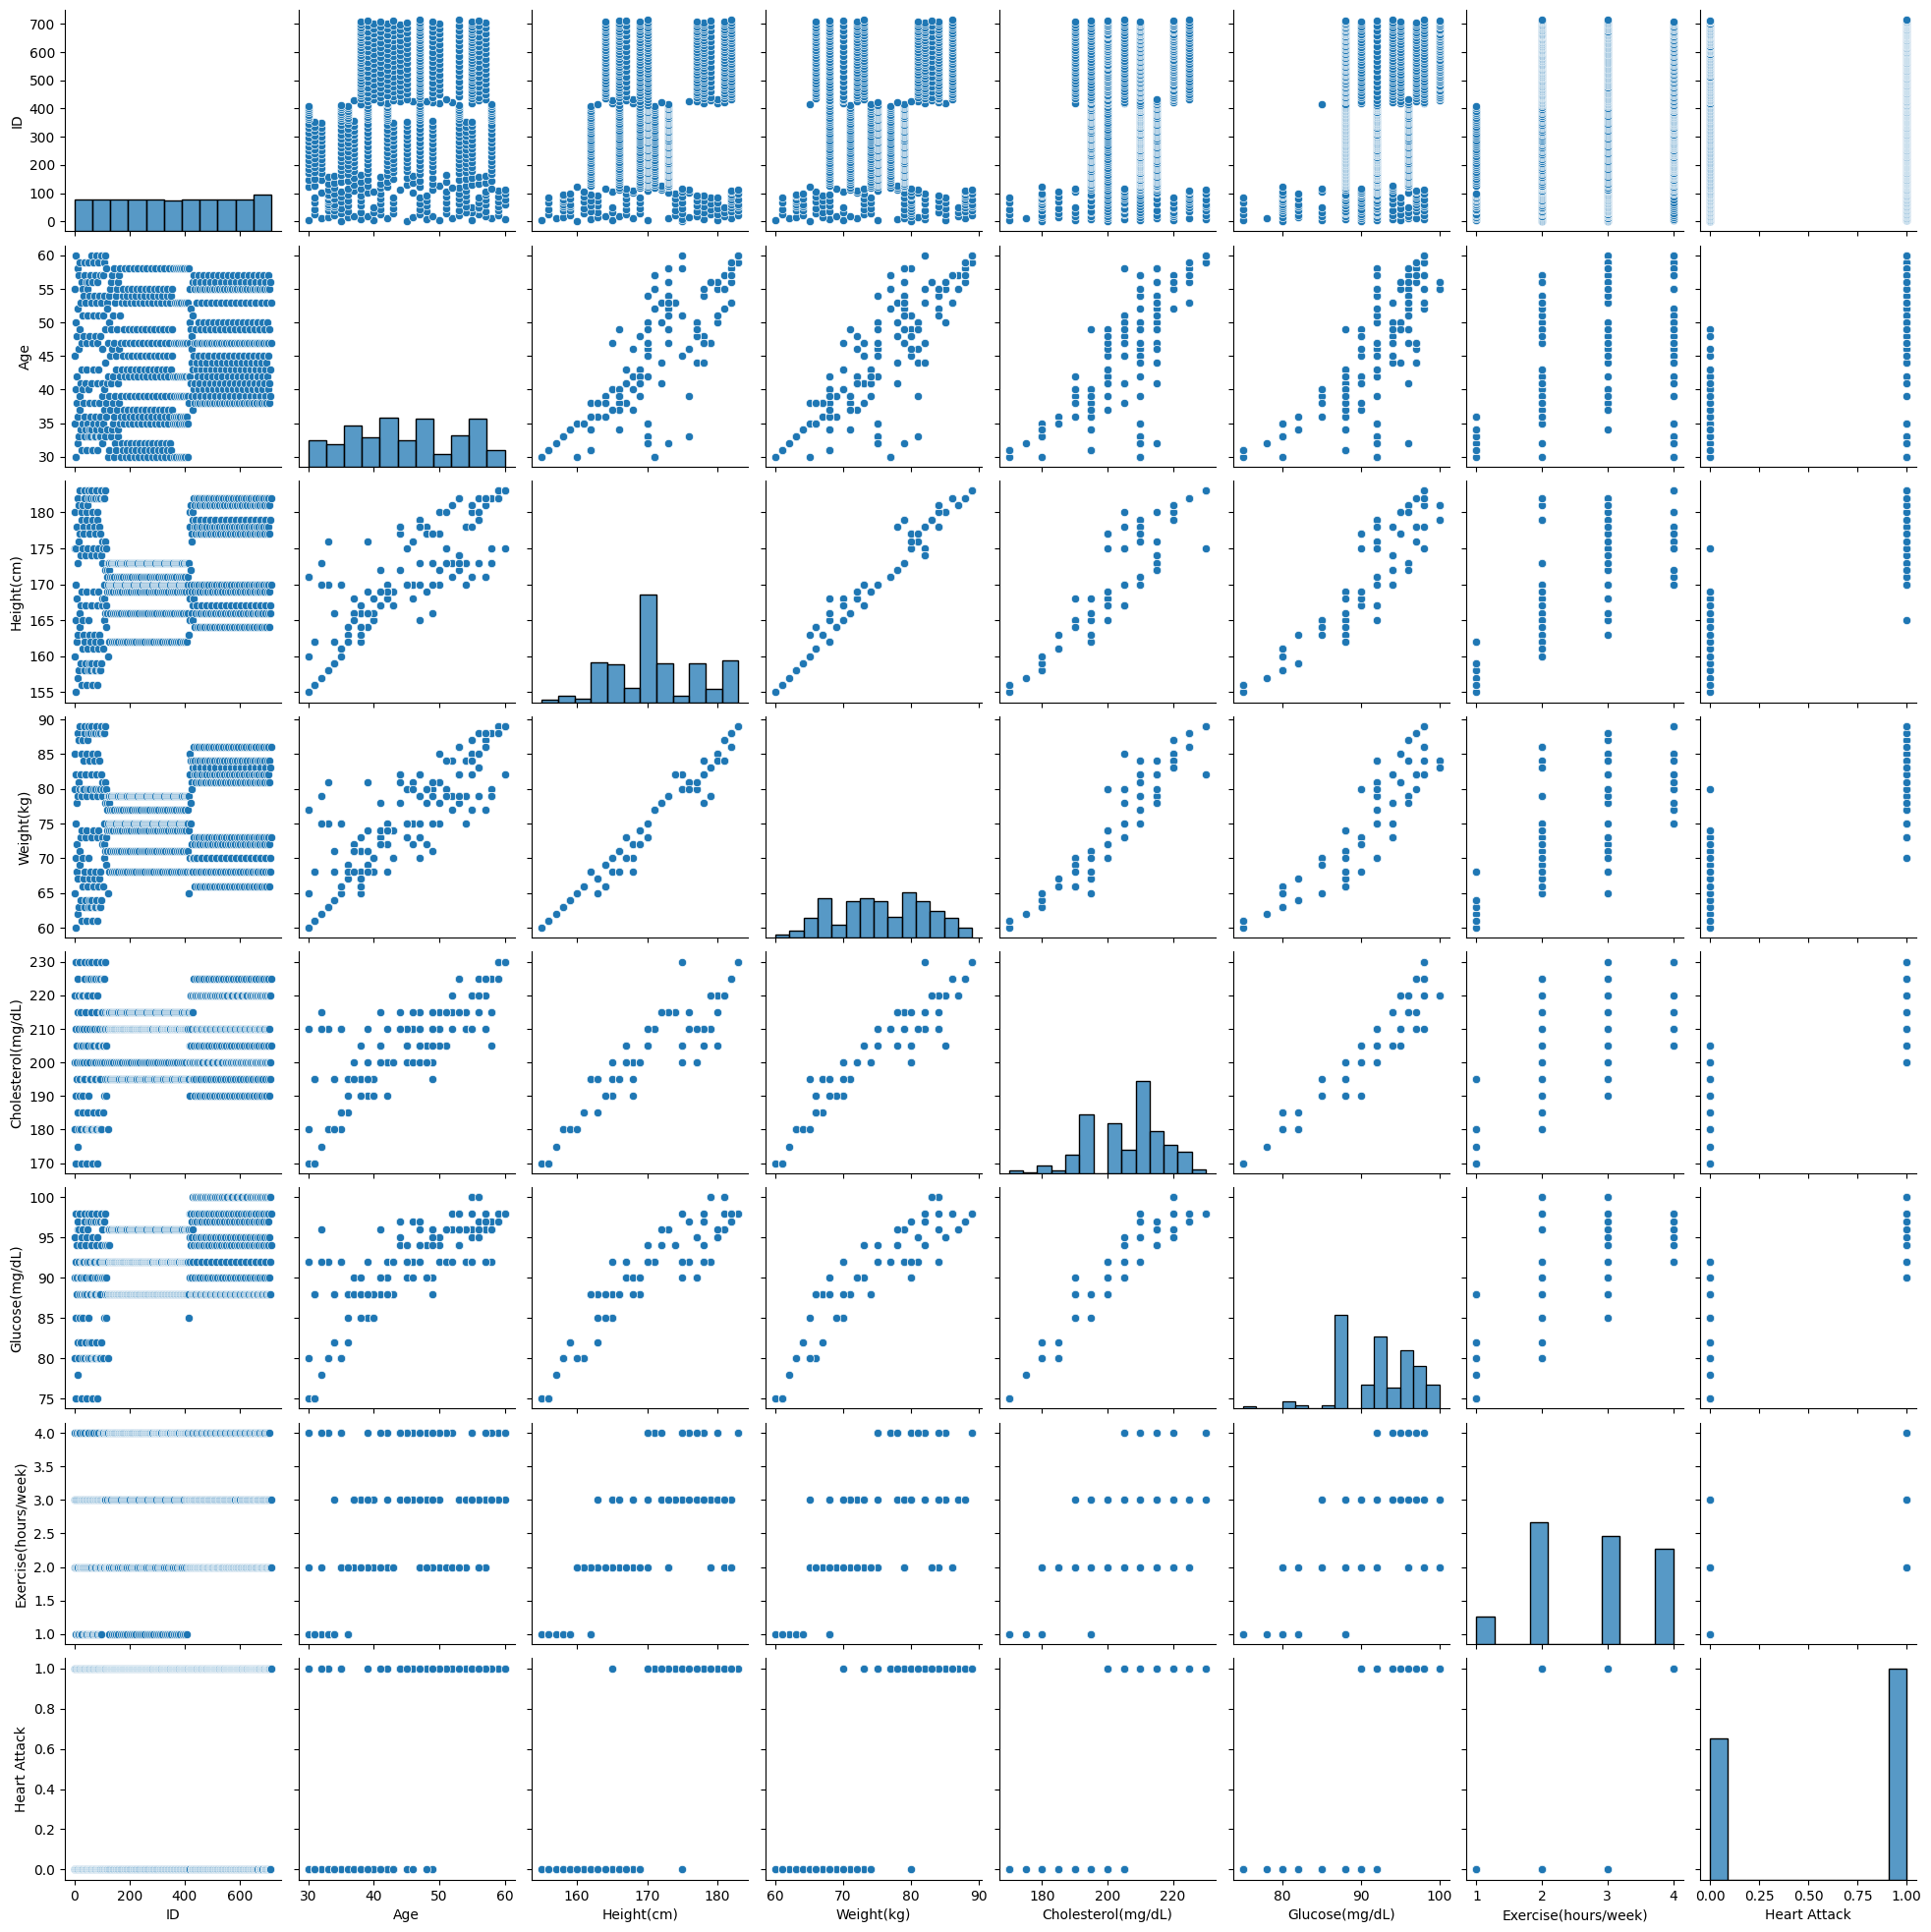

In [5]:
# Making a graph for the dataset

sns.pairplot(heart_attack_df)

In [6]:
#We see no missing null values based on our info.

#We can drop the columns that are not important to us, which are ID and name

heart_attack_df = heart_attack_df.drop(['ID', 'Name'], axis = 1)

print(heart_attack_df)


     Age  Gender  Height(cm)  Weight(kg) Blood Pressure(mmHg)  \
0     45    Male         175          80               120/80   
1     35  Female         160          65               110/70   
2     55    Male         180          85               130/85   
3     40  Female         165          70               115/75   
4     50    Male         170          75               125/80   
..   ...     ...         ...         ...                  ...   
719   39  Female         166          68               118/76   
720   56    Male         179          83               123/80   
721   43  Female         167          70               120/78   
722   53    Male         182          86               125/78   
723   47  Female         170          73               121/77   

     Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  Exercise(hours/week)  \
0                   200              90     No                     3   
1                   180              80     No                     2   
2  

In [7]:
#Making a new column called BMI since we have height and weight in our columns

#BMI formula
bmi = heart_attack_df['Weight(kg)'] / (heart_attack_df['Height(cm)']/100)**2

#Inserting the BMI formula to a new column in the dataset
heart_attack_df.insert(2, 'BMI', bmi, True)

In [8]:
#Checking if BMI is in the dataset
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   724 non-null    int64  
 1   Gender                724 non-null    object 
 2   BMI                   724 non-null    float64
 3   Height(cm)            724 non-null    int64  
 4   Weight(kg)            724 non-null    int64  
 5   Blood Pressure(mmHg)  724 non-null    object 
 6   Cholesterol(mg/dL)    724 non-null    int64  
 7   Glucose(mg/dL)        724 non-null    int64  
 8   Smoker                724 non-null    object 
 9   Exercise(hours/week)  724 non-null    int64  
 10  Heart Attack          724 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 62.3+ KB


In [9]:
#Deleting Height in our dataset
heart_attack_df.drop('Height(cm)', axis=1, inplace=True)

In [10]:
#Deleting Weight in the dataset
heart_attack_df.drop('Weight(kg)', axis=1, inplace=True)

In [11]:
#Splitting the Blood Pressure column into two columns

heart_attack_df[['Systolic_BP', 'Diastolic_BP']] =heart_attack_df['Blood Pressure(mmHg)'].str.split('/', expand=True).astype(int)

heart_attack_df

,Age,Gender,BMI,Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic_BP,Diastolic_BP
0,45,Male,26.122449,120/80,200,90,No,3,0,120,80
1,35,Female,25.390625,110/70,180,80,No,2,0,110,70
2,55,Male,26.234568,130/85,220,95,Yes,4,1,130,85
3,40,Female,25.711662,115/75,190,85,No,3,0,115,75
4,50,Male,25.951557,125/80,210,92,Yes,2,1,125,80
...,...,...,...,...,...,...,...,...,...,...,...
719,39,Female,24.677021,118/76,195,88,No,3,0,118,76
720,56,Male,25.904310,123/80,220,100,No,2,1,123,80
721,43,Female,25.099502,120/78,200,92,No,2,0,120,78
722,53,Male,25.963048,125/78,225,98,Yes,2,1,125,78


In [12]:
#Deleting the Blood Pressure column from the dataset

heart_attack_df.drop('Blood Pressure(mmHg)', axis=1, inplace=True)

In [13]:
heart_attack_df['Exercise(hours/week)'].unique()

array([3, 2, 4, 1])

In [14]:
#Changing Gender and Smoker columns into binary values for our modeling

heart_attack_df['Gender'].replace(['Male', 'Female'], [0,1], inplace=True)
heart_attack_df['Smoker'].replace(['No', 'Yes'], [0,1], inplace=True)

In [15]:
# Changing the columns that are int64 into a float type
heart_attack_df['Age']= heart_attack_df['Age'].astype(float)
heart_attack_df['Cholesterol(mg/dL)'] = heart_attack_df['Cholesterol(mg/dL)'].astype(float)
heart_attack_df['Glucose(mg/dL)'] = heart_attack_df['Glucose(mg/dL)'].astype(float)
heart_attack_df['Exercise(hours/week)'] = heart_attack_df['Exercise(hours/week)'].astype(float)
heart_attack_df['Systolic_BP'] = heart_attack_df['Systolic_BP'].astype(float)
heart_attack_df['Diastolic_BP'] = heart_attack_df['Diastolic_BP'].astype(float)

In [16]:
# Changing the values in the columns to categorical columns

#Age
bins = [0, 35, 65, float('inf')]
labels = ['Young Adult', 'Middle-Aged Adult', 'Elderly']
heart_attack_df['Age'] = pd.cut(heart_attack_df['Age'], bins=bins, labels=labels, right=False)

#BMI
bins = [0, 25, 30, float('inf')]
labels = ['Healthy', 'Overweight', 'Obese']
heart_attack_df['BMI'] = pd.cut(heart_attack_df['BMI'], bins=bins, labels=labels,
                                right=False)

#Cholesterol
bins = [0, 200, 240, float('inf')]
labels = ['Normal', 'Borderline High', 'High']
heart_attack_df['Cholesterol(mg/dL)'] = pd.cut(heart_attack_df['Cholesterol(mg/dL)'], bins=bins,
                                        labels=labels, right=False)

#Glucose
bins = [0, 70, 100, 125, float('inf')]
labels = ['Below Normal', 'Normal', 'Borderline High', 'High']
heart_attack_df['Glucose(mg/dL)'] = pd.cut(heart_attack_df['Glucose(mg/dL)'], bins=bins,
                                    labels=labels, right=False)

#Exercise
bins = [0, 2.5, 3, float('inf')]
labels = ['Less Exercise', 'Normal Exercise', 'High Exercise']
heart_attack_df['Exercise(hours/week)'] = pd.cut(heart_attack_df['Exercise(hours/week)'],
                                                 bins=bins, labels=labels, right=False)

#Systolic_BP
bins = [0, 120, 140, float('inf')]
labels = ['Normal', 'Borderline High', 'High']
heart_attack_df['Systolic_BP'] = pd.cut(heart_attack_df['Systolic_BP'],
                                        bins=bins, labels=labels, right=False)

#Diastolic_BP
bins = [0, 80, 90, float('inf')]
labels = ['Normal', 'Borderline High', 'High']
heart_attack_df['Diastolic_BP'] = pd.cut(heart_attack_df['Diastolic_BP'], bins=bins, labels=labels, right=False)

**Graphs on Different Features That Possibily Affect Heart Attack**

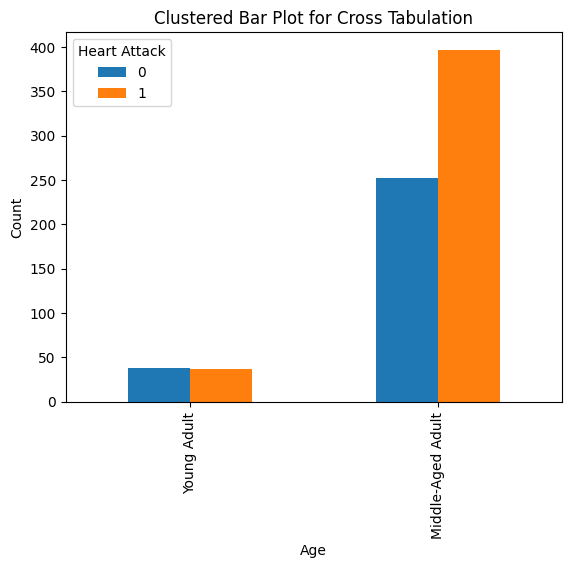

Cross-Tabulation:
Heart Attack         0    1
Age                        
Young Adult         38   37
Middle-Aged Adult  252  397
P-value: 0.06339982845485242


In [17]:
# Age vs Heart Attack

Xtab = pd.crosstab(heart_attack_df['Age'], heart_attack_df['Heart Attack'])

#Creating a clustered bar plot for the possible correlation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for Cross Tabulation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.show()

#Using stats to find chi-square test
from scipy import stats

#chi-square test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#print the results
print('Cross-Tabulation:')
print(Xtab)
print('P-value:', pval)

* Based on our graph, **we see that the middle-aged adults would get more heart attacks than young adults**.
* Another observation is that young adults don't get heart attacks, but slightly.

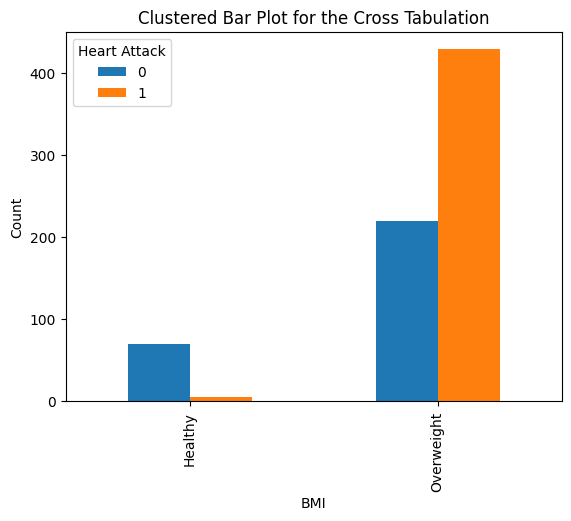

Cross Tabulation:
Heart Attack    0    1
BMI                   
Healthy        70    5
Overweight    220  429
P-value: 9.150247528790241e-23


In [18]:
# BMI vs Heart Attack

Xtab = pd.crosstab(heart_attack_df['BMI'], heart_attack_df['Heart Attack'])

#Plotting the clustered bar plot for the cross tabulation

Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for the Cross Tabulation')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.show()

#Chi-Square test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing out the results
print('Cross Tabulation:')
print(Xtab)
print('P-value:', pval)

* Patients who tend to be overweight has a high chance of getting a heart attack with the orange column being higher than the blue column.

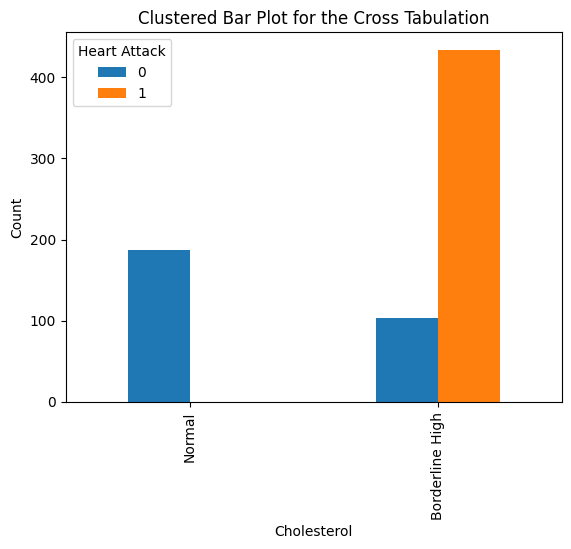

Cross Tabulation:
Heart Attack          0    1
Cholesterol(mg/dL)          
Normal              187    0
Borderline High     103  434
P-value: 2.5820044358546874e-83


In [19]:
# Cholesterol vs Heart Attack

Xtab = pd.crosstab(heart_attack_df['Cholesterol(mg/dL)'], heart_attack_df['Heart Attack'])

#Plotting the clustered bar plot for the cross tabulation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for the Cross Tabulation')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.show()

#Chi-Square Test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing the results
print('Cross Tabulation:')
print(Xtab)
print('P-value:', pval)

* Patients with Borderline High Cholesterol would have a high possibility of getting a heart attack based on the graph.

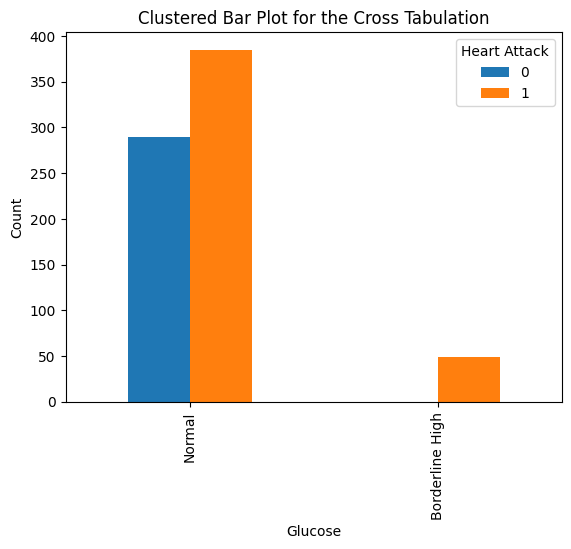

Cross Tabulation
Heart Attack       0    1
Glucose(mg/dL)           
Normal           290  385
Borderline High    0   49
P-value: 7.688893836934964e-09


In [20]:
# Glucose vs Heart Attack

Xtab = pd.crosstab(heart_attack_df['Glucose(mg/dL)'], heart_attack_df['Heart Attack'])

#Plotting the Cross-Tabulation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for the Cross Tabulation')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.show()

#Chi-Square test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing the results
print('Cross Tabulation')
print(Xtab)
print('P-value:', pval)

Patients with normal glucose tend to have a higher chance of getting a heart attack based on the graph, which is surprising. Possibly environmental factors on the person.

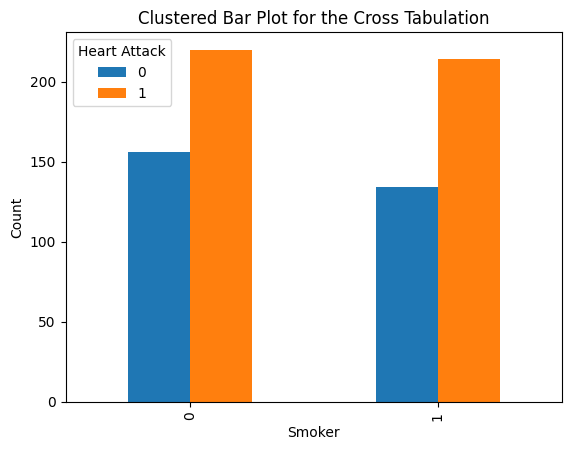

Cross Tabulation
Heart Attack    0    1
Smoker                
0             156  220
1             134  214
P-value 0.4576871399917093


In [21]:
# Smoker vs. Heart Attack

Xtab = pd.crosstab(heart_attack_df['Smoker'], heart_attack_df['Heart Attack'])

#Plotting the cross tabulation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for the Cross Tabulation')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.show()

#chi-sqauare test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing out the results
print('Cross Tabulation')
print(Xtab)
print('P-value', pval)

* Patients who don't smoke and smoke has almost the same level of the orange columns, which means that Non-smokers and smokers would likely have a heart attack.

Cross Tabulation
Heart Attack            0    1
Exercise(hours/week)          
Less Exercise         211   95
High Exercise          79  339
P-value: 1.548609895482942e-41


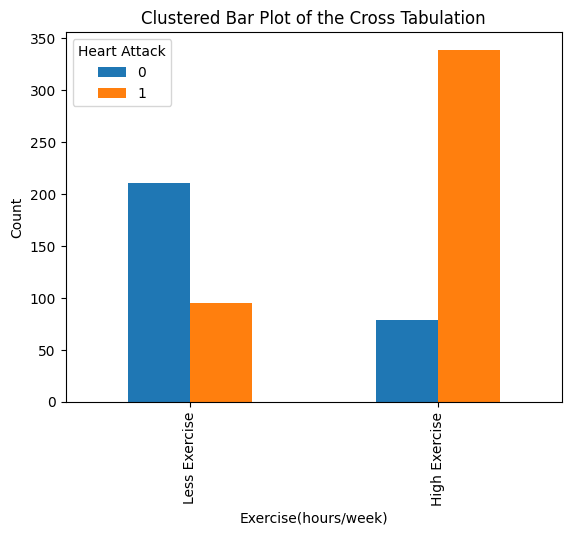

In [22]:
# Exercise vs Heart Attack

Xtab = pd.crosstab(heart_attack_df['Exercise(hours/week)'],
                   heart_attack_df['Heart Attack'])

#Plotting the cross tabulation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot of the Cross Tabulation')
plt.xlabel('Exercise(hours/week)')
plt.ylabel('Count')
plt.legend(title='Heart Attack')

#Chi-Square test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing out the results
print('Cross Tabulation')
print(Xtab)
print('P-value:', pval)

* Patients who tend to exercise for 1-2 hours tend to have a least likely chance of getting a heart attack compared to patients who exercise for more than 2 hours.

Cross Tabulation
Heart Attack       0    1
Systolic_BP              
Normal           187    1
Borderline High  103  433
P-value: 1.8851781135108153e-82


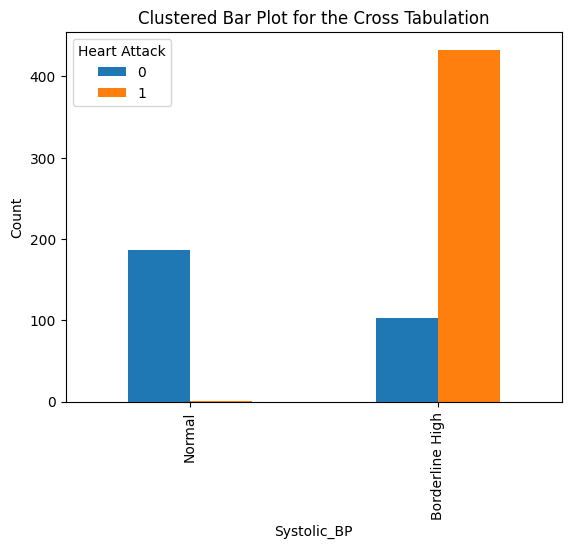

In [23]:
# Systolic Blood Pressure vs. Heart Attack

Xtab = pd.crosstab(heart_attack_df['Systolic_BP'], heart_attack_df['Heart Attack'])

#Plotting the Cross Tabulation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for the Cross Tabulation')
plt.xlabel('Systolic_BP')
plt.ylabel('Count')
plt.legend(title='Heart Attack')

#Chi-Square Test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing out the results
print('Cross Tabulation')
print(Xtab)
print('P-value:', pval)

* Based on the graph, patients with Borderline High Systolic Blood Pressure would likely have a heart attack.

Cross Tabulation
Heart Attack       0    1
Diastolic_BP             
Normal           289  184
Borderline High    1  250
P-value: 4.045952157780876e-56


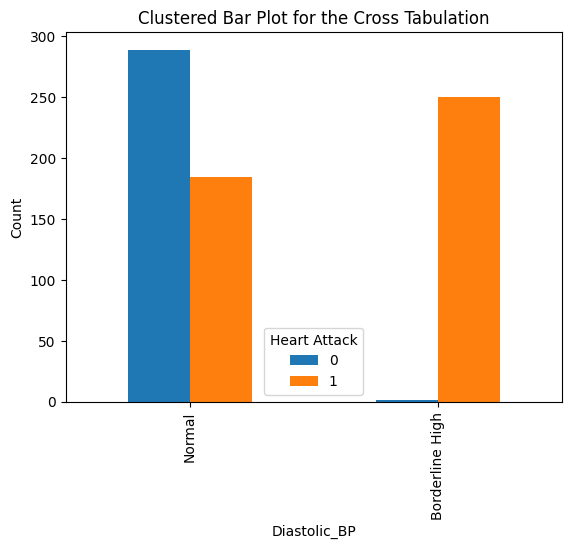

In [24]:
# Diastolic Blood Pressure vs. Heart Attack

Xtab = pd.crosstab(heart_attack_df['Diastolic_BP'], heart_attack_df['Heart Attack'])

#Plotting the cross tabulation
Xtab.plot(kind='bar')
plt.title('Clustered Bar Plot for the Cross Tabulation')
plt.xlabel('Diastolic_BP')
plt.ylabel('Count')
plt.legend(title='Heart Attack')

#Chi-Square Test
chi2, pval, dof, expected = stats.chi2_contingency(Xtab)

#Printing out the results
print('Cross Tabulation')
print(Xtab)
print('P-value:', pval)

* Looking at the graph, we see that patients who have Borderline High Blood Pressure would have a higher chance of getting a heart attack.

In [25]:
# We will now do a Feature Transformation for the columns of the dataset using
#hot-encoding

columns = heart_attack_df[['Age', 'BMI', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
'Exercise(hours/week)', 'Systolic_BP', 'Diastolic_BP', 'Smoker', 'Heart Attack']]

df = pd.get_dummies(columns, drop_first=True)

In [26]:
#Checking for df
df

,Smoker,Heart Attack,Age_Middle-Aged Adult,Age_Elderly,BMI_Overweight,BMI_Obese,Cholesterol(mg/dL)_Borderline High,Cholesterol(mg/dL)_High,Glucose(mg/dL)_Normal,Glucose(mg/dL)_Borderline High,Glucose(mg/dL)_High,Exercise(hours/week)_Normal Exercise,Exercise(hours/week)_High Exercise,Systolic_BP_Borderline High,Systolic_BP_High,Diastolic_BP_Borderline High,Diastolic_BP_High
0,0,0,True,False,True,False,True,False,True,False,False,False,True,True,False,True,False
1,0,0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False
2,1,1,True,False,True,False,True,False,True,False,False,False,True,True,False,True,False
3,0,0,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False
4,1,1,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
720,0,1,True,False,True,False,True,False,False,True,False,False,False,True,False,True,False
721,0,0,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False
722,1,1,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False


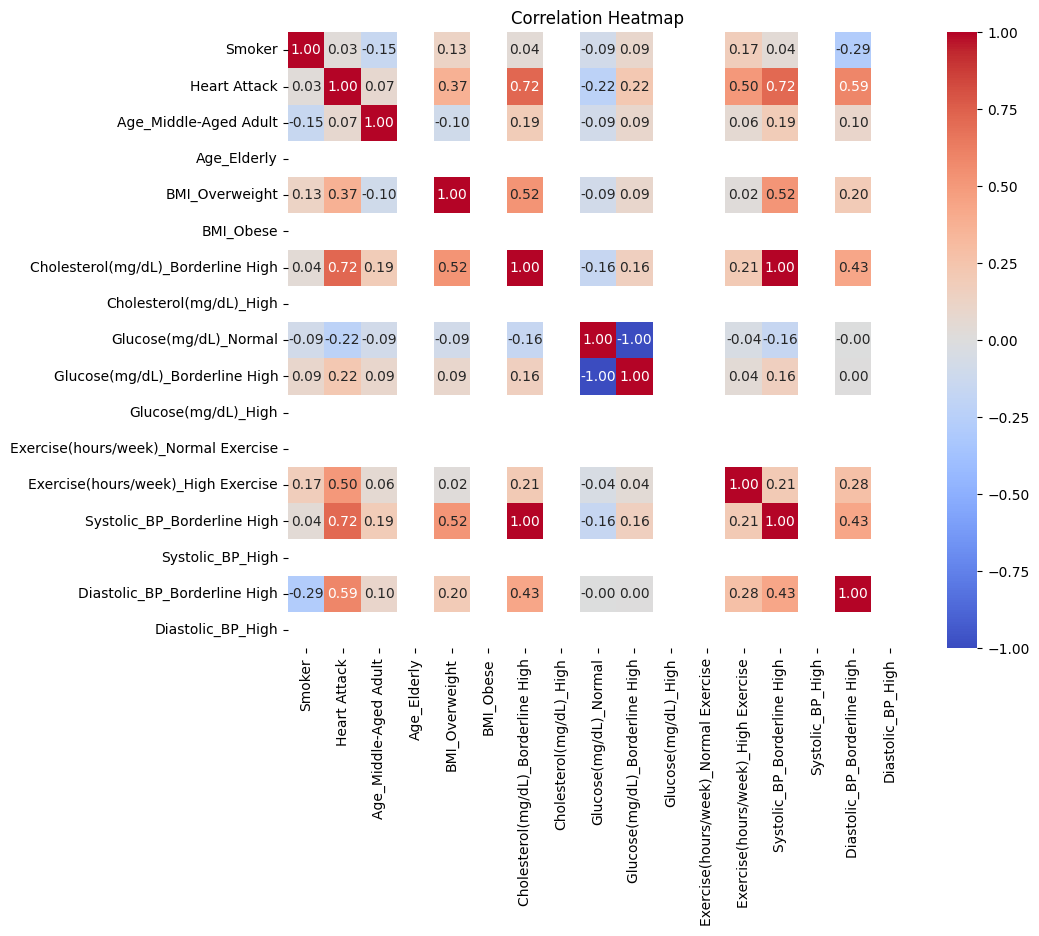

In [27]:
#Correlation matrix for the new dataframe
corr_matrix = df.corr()

#Creating a heatmap for the df
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

#Displaying heatmap
plt.title('Correlation Heatmap')
plt.show()

**Predictive Model**

After splitting the data, predictive models that we would use for Classification includes **Logistic Regression**, **Decision Tree**, **Support Vector Machine**,**Random Forest**, **K-nearest Neighbors** and **XGBoost**

In [28]:
# Data Splitting

X = df[['Age_Middle-Aged Adult', 'BMI_Overweight', 'Cholesterol(mg/dL)_Borderline High',
        'Glucose(mg/dL)_Borderline High', 'Exercise(hours/week)_High Exercise',
        'Systolic_BP_Borderline High', 'Diastolic_BP_Borderline High', 'Smoker']]

y = df['Heart Attack']

#Splitting the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=42)

In [29]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Fit the model using the train dataset
lr.fit(X_train, y_train)

#Predicting the model using the test set
y_pred = lr.predict(X_test)

#Evaluating the classifier's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classificaton Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.96
Classificaton Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


In [30]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_class = DecisionTreeClassifier(random_state=20)

dt_class.fit(X_train, y_train)

y_pred = dt_class.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


In [31]:
# Support Vector Machine

from sklearn.svm import SVC

sv_mac = SVC(kernel='rbf', gamma=0.01, C=1.0)

sv_mac.fit(X_train, y_train)

y_pre = sv_mac.predict(X_test)


accuracy = accuracy_score(y_test, y_pre)
class_report = classification_report(y_test, y_pre)
con_matrix = confusion_matrix(y_test, y_pre)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.81
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        32
           1       0.75      1.00      0.85        41

    accuracy                           0.81        73
   macro avg       0.87      0.78      0.79        73
weighted avg       0.86      0.81      0.80        73

Confusion Matrix:
 [[18 14]
 [ 0 41]]


In [32]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier()

knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.83      0.95      0.89        41

    accuracy                           0.86        73
   macro avg       0.88      0.85      0.86        73
weighted avg       0.87      0.86      0.86        73

Confusion Matrix:
 [[24  8]
 [ 2 39]]


In [33]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_class = RandomForestClassifier()

rf_class.fit(X_train, y_train)

y_pred = rf_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


In [34]:
# XGBoost Classifier

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=True)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


**Predictive Modeling with Hyperparameter Tuning**

With Hyperparameter Tuning, we can have a better accuracy when changing our parameters in the predictive models. We will include the same predictive models with the addition of changing our parameter

In [35]:
# Logistic Regression Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver":["liblinear"]}

lr = LogisticRegression()

#Using GridSearch to find the best parameters for the accuracy score
lr_cv = GridSearchCV(lr, params, scoring='accuracy', n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters:{best_params}")

lr = LogisticRegression(**best_params)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters:{'C': 0.23357214690901212, 'solver': 'liblinear'}
Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


In [36]:
#Decision Tree Classifier Hyperparameter Tuning

params = {
    "criterion":("geni", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1,20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1,20))
}

dt_class = DecisionTreeClassifier(random_state=20)

dt_grid = GridSearchCV(dt_class, params, scoring="accuracy", n_jobs=1, verbose=1, cv=5)

dt_grid.fit(X_train, y_train)

best_params = dt_grid.best_params_
print(f"Best params:{best_params}")

dt_class = DecisionTreeClassifier(**best_params)

dt_class.fit(X_train, y_train)

y_pred = dt_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10830 fits failed out of a total of 21660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10830 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in

Best params:{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.94315913 0.94315913 0.94315913]
  warnings.warn(


In [37]:
#Support Vector Machine Hyperparameter Tuning

svm_class = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {
    "C":(0.01, 0.1, 0.5, 1, 2, 5, 10, 20),
    "gamma":(0.01, 0.1, 0.25, 0.5, 0.75, 1.0),
    "kernel":("linear", "poly", "rbf")
}

svm_grid = GridSearchCV(svm_class, params, n_jobs=1, verbose=1, cv=5, scoring="accuracy")

svm_grid.fit(X_train, y_train)

best_params = svm_grid.best_params_
print(f"Best parameters:{best_params}")

svm_class = SVC(**best_params)
svm_class.fit(X_train, y_train)

y_pred = svm_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters:{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


Maximum KNN score on the test data: 94.32%


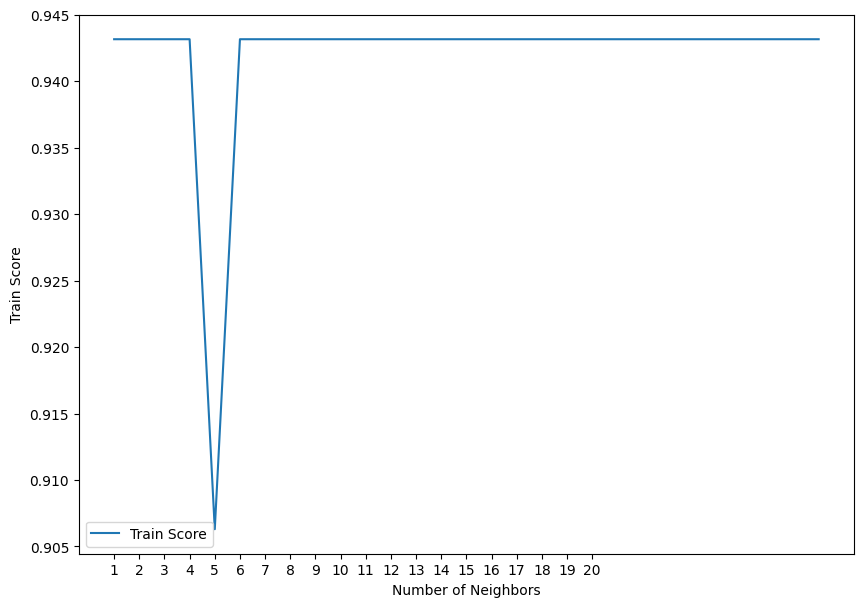

In [38]:
#K-Nearest Neighbors Hyperparameter Tuning (Different Approach)

train_score = []
test_score = []
n_neighbors = range(1,30)

for i in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  train_score.append(accuracy_score(y_train, model.predict(X_train)))


#Plotting the score in order to get our k
plt.figure(figsize=(10,7))

plt.plot(n_neighbors, train_score, label='Train Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Train Score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [39]:
#K-Nearest Neighbors Hyperparameter Tuning

knn_class = KNeighborsClassifier(n_neighbors=20)
knn_class.fit(X_train, y_train)

y_pred = knn_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


In [50]:
# Random Forest Classifier Hyperparameter Tuning

n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf = RandomForestClassifier(random_state=42)

rf_cv= GridSearchCV(rf, params_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters:{best_params}")

#Include our best parameters
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters:{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


In [51]:
#XGBoost Classifer Hyperparameter Tuning

from scipy import stats

param_grids = dict(
    n_estimators = stats.randint(10, 1000),
    max_depth = stats.randint(1, 100),
    learning_rate = stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder = False)
xgb_cv = RandomizedSearchCV(xgb_clf, param_grids, verbose=1, cv=5, n_jobs=-1,
                            n_iter=100, scoring='accuracy')
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best parameters:{best_params}")

#Including the best parameters
xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

#Printing out the results
print(f"Accuracy:{accuracy:.2f}")
print(f"Classification Report:\n", class_report)
print(f"Confusion Matrix:\n", con_matrix)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters:{'learning_rate': 0.8288206562524968, 'max_depth': 9, 'n_estimators': 207}
Accuracy:0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.95      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73

Confusion Matrix:
 [[31  1]
 [ 2 39]]


* The results happen to be the same even with Hyperparameter Tuning, which means there are no effects from our predictive model accuracy.
* All of the results with Hyperparameter Tuning have 96% accuracy. This might be due to how we have chosen our independent variables.  

**Feature Importance in Decision Tree and Random Forest**

* Since we have a 96% accuracy from most of the predictive models, we'll graph the feature importances for our variable, X, from the train_test_split and predictive model.
*It is important to have feature importance because feature importance indicates how a feature in the dataset affects the model prediction.

In [52]:
def feature_import(df, model):
  new_df = pd.DataFrame()
  new_df['feature'] = new_df.columns
  new_df['importance'] = model.feature_importances_
  return new_df.sort_values(by='importance', ascending=False)


<Axes: >

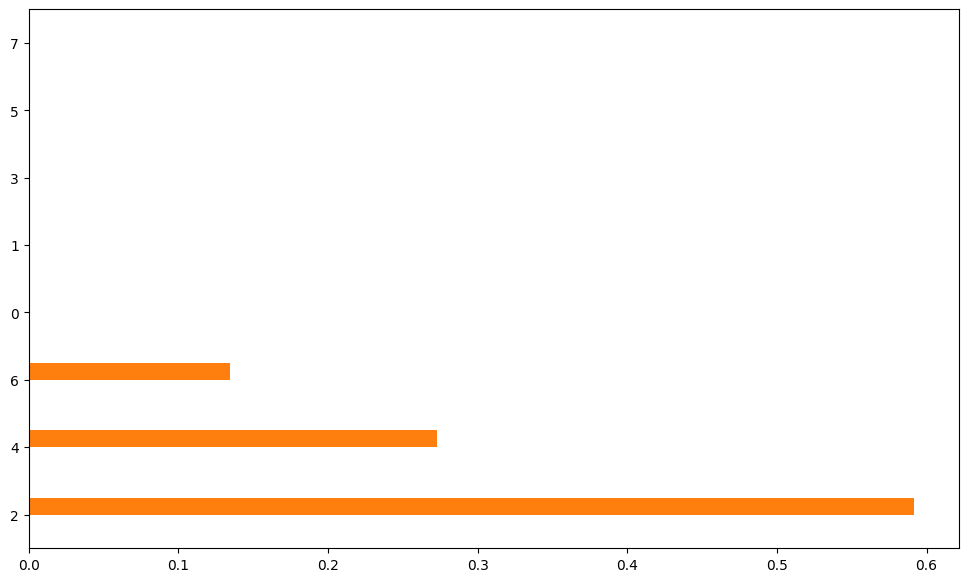

In [54]:
feature_import(X, dt_class).plot(kind='barh', figsize=(12,7), legend=False)

<Axes: >

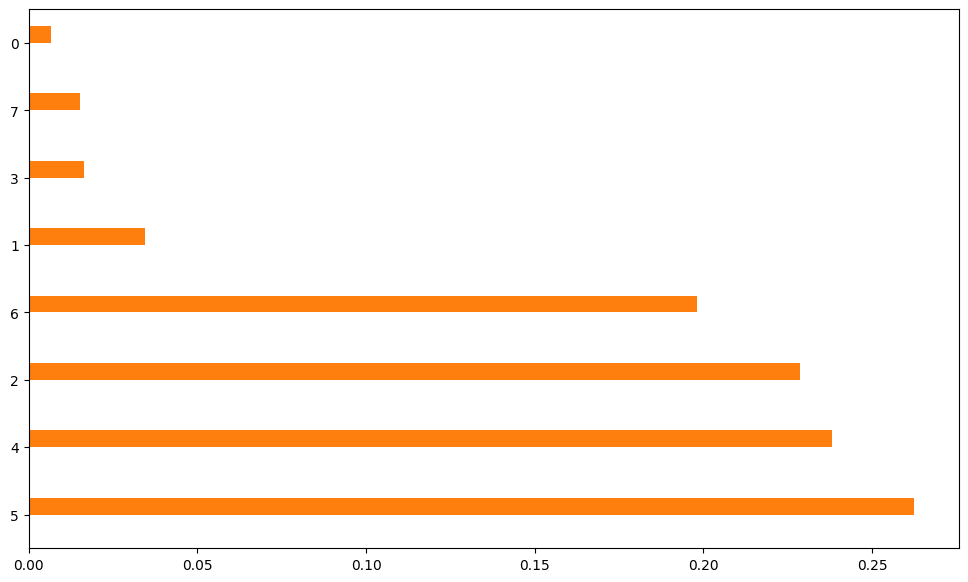

In [55]:
feature_import(X, rf_class).plot(kind='barh', figsize=(12,7), legend=False)

In [ ]:
##This method took too long to run when I used this approach


#K-Nearest Neighbors Hyperparameter Tuning

#knn_class = KNeighborsClassifier()

#params = {
#    'n_neighbors':np.arange(1,30),
#    'weights':['uniform', 'distance'],
#    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#    'leaf_size':np.arange(1,50),
#    'metric':['minkowski', 'euclidean', 'manhattan'],
#    'p':[1,2]
#}

#knn_grid = GridSearchCV(knn_class, params, scoring='accuracy', verbose=1, cv=3, n_jobs=-1)
#knn_grid.fit(X_train, y_train)

#best_params = knn_grid.best_params_
#print(f"Best parameters: {best_params}")

#knn_class = KNeighborsClassifier(**best_params)
#knn_class.fit(X_train, y_train)

#y_pred = knn_class.perdict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#class_report = classification_report(y_test, y_pred)
#con_matrix = confusion_matrix(y_test, y_pred)

##Printing out the results
#print(f"Accuracy:{accuracy:.2f}")
#print(f"Classification Report:\n", class_report)
#print(f"Confusion Matrix:\n", con_matrix)

Fitting 3 folds for each of 68208 candidates, totalling 204624 fits
